## PROBLEM SET 3

### Question 1
Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials. 

Occupations 

Step 1. Import the necessary libraries 

Step 2. Import the dataset from this address. 

Step 3. Assign it to a variable called users 

Step 4. Discover what is the mean age per occupation 

Step 5. Discover the Male ratio per occupation and sort it from the most to the least 

Step 6. For each occupation, calculate the minimum and maximum ages 

Step 7. For each combination of occupation and sex, calculate the mean age 

Step 8. For each occupation present the percentage of women and men

In [10]:
import pandas as pd
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')  # Use `|` as the separator for this dataset


In [3]:
# Display the first few rows
print(users.head())

# Display column names and data types
print(users.info())


   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


In [4]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [5]:
# Create a function to calculate male ratio
def male_ratio(group):
    return (group['gender'] == 'M').sum() / group['gender'].count()

male_ratio_per_occupation = users.groupby('occupation').apply(male_ratio).sort_values(ascending=False)
print(male_ratio_per_occupation)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [6]:
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(age_range_per_occupation)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [7]:
mean_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_by_occupation_gender)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [8]:
def gender_percentage(group):
    male_percent = (group['gender'] == 'M').sum() / group['gender'].count() * 100
    female_percent = 100 - male_percent
    return pd.Series({'Male %': male_percent, 'Female %': female_percent})

gender_percent_per_occupation = users.groupby('occupation').apply(gender_percentage)
print(gender_percent_per_occupation)


                   Male %   Female %
occupation                          
administrator   54.430380  45.569620
artist          53.571429  46.428571
doctor         100.000000   0.000000
educator        72.631579  27.368421
engineer        97.014925   2.985075
entertainment   88.888889  11.111111
executive       90.625000   9.375000
healthcare      31.250000  68.750000
homemaker       14.285714  85.714286
lawyer          83.333333  16.666667
librarian       43.137255  56.862745
marketing       61.538462  38.461538
none            55.555556  44.444444
other           65.714286  34.285714
programmer      90.909091   9.090909
retired         92.857143   7.142857
salesman        75.000000  25.000000
scientist       90.322581   9.677419
student         69.387755  30.612245
technician      96.296296   3.703704
writer          57.777778  42.222222


### Question 2
Euro Teams 

Step 1. Import the necessary libraries 

Step 2. Import the dataset from this address 

Step 3. Assign it to a variable called euro12 

Step 4. Select only the Goal column 

Step 5. How many team participated in the Euro2012? 

Step 6. What is the number of columns in the dataset? 

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards 

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goals

Step 11. Select the teams that start 
with G 

Step 12. Select the first 7 columns 

Step 13. Select all columns except the last 3 

Step 14. Present only the Shooting Accuracy from England, Italy and Russia 

In [11]:
import pandas as pd


In [12]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)


In [13]:
# Display the first few rows
print(euro12.head())

# Display column names and data types
print(euro12.info())


             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Saves ma

In [14]:
goals = euro12['Goals']
print(goals)


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [15]:
num_teams = euro12['Team'].nunique()
print(f"Number of teams participated: {num_teams}")


Number of teams participated: 16


In [16]:
num_columns = euro12.shape[1]
print(f"Number of columns: {num_columns}")


Number of columns: 35


In [17]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [18]:
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(sorted_discipline)


                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [19]:
mean_yellow_cards = euro12['Yellow Cards'].mean()
print(f"Mean Yellow Cards per team: {mean_yellow_cards}")


Mean Yellow Cards per team: 7.4375


In [20]:
high_scoring_teams = euro12[euro12['Goals'] > 6]
print(high_scoring_teams)


       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [22]:
teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]
print(teams_starting_with_g)


      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [23]:
first_seven_columns = euro12.iloc[:, :7]
print(first_seven_columns)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [24]:
all_except_last_three = euro12.iloc[:, :-3]
print(all_except_last_three)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [25]:
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


### Question 3
Housing 

Step 1. Import the necessary libraries 

Step 2. Create 3 differents Series, each of length 100, as follows: 

• The first a random number from 1 to 4 

• The second a random number from 1 to 3 

• The third a random number from 10,000 to 30,000 

Step 3. Create a DataFrame by joinning the Series by column 

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter 

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn' 

Step 6. Ops it seems it is going only until index 99. Is it true? 

Step 7. Reindex the DataFrame so it goes from 0 to 299 

In [26]:
import pandas as pd
import numpy as np


In [27]:
np.random.seed(42)  # Set a seed for reproducibility

series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

print(series1.head(), series2.head(), series3.head())


0    3
1    4
2    1
3    3
4    3
dtype: int32 0    3
1    2
2    2
3    2
4    2
dtype: int32 0    23931
1    13627
2    26157
3    20173
4    28047
dtype: int32


In [28]:
housing_df = pd.concat([series1, series2, series3], axis=1)
print(housing_df.head())


   0  1      2
0  3  3  23931
1  4  2  13627
2  1  2  26157
3  3  2  20173
4  3  2  28047


In [29]:
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(housing_df.head())


   bedrs  bathrs  price_sqr_meter
0      3       3            23931
1      4       2            13627
2      1       2            26157
3      3       2            20173
4      3       2            28047


In [30]:
bigcolumn = pd.concat([series1, series2, series3]).reset_index(drop=True)
bigcolumn_df = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
print(bigcolumn_df.head(10))


   bigcolumn
0          3
1          4
2          1
3          3
4          3
5          4
6          1
7          1
8          3
9          2


In [31]:
print(bigcolumn_df.index.max())  # Check the maximum index


299


In [32]:
bigcolumn_df_reindexed = bigcolumn_df.reindex(range(300))
print(bigcolumn_df_reindexed.tail(10))  # Display the last 10 rows


     bigcolumn
290      17400
291      29554
292      19874
293      25151
294      28639
295      11154
296      14499
297      16295
298      22183
299      22874


### Question 4
Wind Statistics  

The data have been modified to contain some missing values, identified by NaN. 
Using pandas should make this exercise easier, in particular for the bonus question. 
 
You should be able to perform all of these operations without using a for loop or 
other looping construct. 
 
The data in 'wind.data' has the following format: 
 
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   
MAL 
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04 
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83 
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71 
The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day. 
 
Step 1. Import the necessary libraries 

Step 2. Import the dataset from the attached file wind.txt 

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index. 

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it. 

Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns]. 

Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below. 

Step 7. Compute how many non-missing values there are in total. 

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times. A single number for the entire dataset. 

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days A different set of numbers for each location. 

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day. A different set of numbers for each day. 

Step 11. Find the average windspeed in January for each location.  Treat January 1961 and January 1962 both as January. 

Step 12. Downsample the record to a yearly frequency for each location. 

Step 13. Downsample the record to a monthly frequency for each location. 

Step 14. Downsample the record to a weekly frequency for each location. 

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.

In [52]:
import pandas as pd
import numpy as np


In [63]:
# Load the dataset from the file
data = pd.read_csv("wind.txt", delim_whitespace=True)

# Display the first few rows and the column names
print(data.head())
print(data.columns)


   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  
Index(['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL'],
      dtype='object')


In [64]:
# Assign column names
column_names = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 
                'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
data.columns = column_names

# Verify the column names
print(data.head())


   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [65]:
# Create a proper datetime column
data['Date'] = pd.to_datetime({
    'year': data['Yr'] + 1900,  # Add 1900 to the year
    'month': data['Mo'],
    'day': data['Dy']
})

# Verify the new column
print(data[['Date', 'Yr', 'Mo', 'Dy']].head())


        Date  Yr  Mo  Dy
0 1961-01-01  61   1   1
1 1961-01-02  61   1   2
2 1961-01-03  61   1   3
3 1961-01-04  61   1   4
4 1961-01-05  61   1   5


In [66]:
# Drop Yr, Mo, Dy columns
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)

# Set the Date column as the index
data = data.set_index('Date')

# Verify the updated dataset
print(data.head())


              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
Date                             
1961-01-01  12.58  18.50  15.04  
1961-01-02   9.67  17.54  13.83  
1961-01-03   7.67  12.75  12.71  
1961-01-04   5.88   5.46  10.88  
1961-01-05  10.34  12.92  11.83  


In [67]:
# Fix incorrect years
data.index = data.index.map(lambda x: x.replace(year=1961) if x.year == 2061 else x)

# Verify the unique years in the index
print(data.index.year.unique())


Index([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978],
      dtype='int32', name='Date')


In [68]:
# Count missing values for each location
missing_values = data.isna().sum()
print("Missing values per location:\n", missing_values)

# Count total non-missing values
non_missing_values = data.notna().sum().sum()
print(f"Total non-missing values: {non_missing_values}")


Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
Total non-missing values: 78857


In [69]:
# Calculate the overall mean windspeed
mean_windspeed = data.mean().mean()
print(f"Mean windspeed: {mean_windspeed}")


Mean windspeed: 10.227982360836938


In [70]:
# Create a DataFrame with location statistics
loc_stats = data.describe().loc[['min', 'max', 'mean', 'std']].transpose()
print("Location statistics:\n", loc_stats)


Location statistics:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [71]:
# Calculate statistics across all locations for each day
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print("Daily statistics:\n", day_stats.head())


Daily statistics:
              min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356


In [72]:
# Filter for January data and calculate average windspeed
january_data = data[data.index.month == 1]
january_avg = january_data.mean()
print("January average wind speeds:\n", january_avg)


January average wind speeds:
 RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [73]:
# Downsample to yearly frequency
yearly_data = data.resample('Y').mean()
print("Yearly averages:\n", yearly_data)


Yearly averages:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5

In [74]:
# Downsample to monthly frequency
monthly_data = data.resample('M').mean()
print("Monthly averages:\n", monthly_data)


Monthly averages:
                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065 

In [75]:
# Downsample to weekly frequency
weekly_data = data.resample('W').mean()
print("Weekly averages:\n", weekly_data)


Weekly averages:
                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429 

In [76]:
# Calculate weekly statistics for the first 52 weeks
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
print("First 52 weeks statistics:\n", weekly_stats)


First 52 weeks statistics:
               RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12

### Question 5
Step 1. Import the necessary libraries 

Step 2. Import the dataset from this address. 

Step 3. Assign it to a variable called chipo. 

Step 4. See the first 10 entries 

Step 5. What is the number of observations in the dataset? 

Step 6. What is the number of columns in the dataset? 

Step 7. Print the name of all the columns. 

Step 8. How is the dataset indexed? 

Step 9. Which was the most-ordered item? 

Step 10. For the most-ordered item, how many items were ordered? 

Step 11. What was the most ordered item in the choice_description column? 

Step 12. How many items were orderd in total? 

Step 13. 

• Turn the item price into a float 

• Check the item price type 

• Create a lambda function and change the type of item price 

• Check the item price type 

Step 14. How much was the revenue for the period in the dataset? 

Step 15. How many orders were made in the period? 

Step 16. What is the average revenue amount per order? 

Step 17. How many different items are sold?

In [35]:
import pandas as pd


In [36]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')  # The separator is a tab ('\t')


In [37]:
# Display the first few rows
print(chipo.head())

# Display column names and data types
print(chipo.info())


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id    

In [38]:
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [39]:
num_observations = chipo.shape[0]
print(f"Number of observations: {num_observations}")


Number of observations: 4622


In [40]:
num_columns = chipo.shape[1]
print(f"Number of columns: {num_columns}")


Number of columns: 5


In [41]:
print(chipo.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [42]:
print(chipo.index)


RangeIndex(start=0, stop=4622, step=1)


In [43]:
most_ordered_item = chipo.groupby('item_name').quantity.sum().idxmax()
print(f"Most ordered item: {most_ordered_item}")


Most ordered item: Chicken Bowl


In [44]:
quantity_most_ordered = chipo[chipo['item_name'] == most_ordered_item].quantity.sum()
print(f"Total quantity of {most_ordered_item} ordered: {quantity_most_ordered}")


Total quantity of Chicken Bowl ordered: 761


In [45]:
most_ordered_choice = chipo.choice_description.value_counts().idxmax()
print(f"Most ordered choice description: {most_ordered_choice}")


Most ordered choice description: [Diet Coke]


In [46]:
total_items_ordered = chipo.quantity.sum()
print(f"Total items ordered: {total_items_ordered}")


Total items ordered: 4972


In [47]:
# Remove the dollar sign and convert to float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# Check the data type of the item_price column
print(chipo['item_price'].dtype)


float64


In [48]:
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"Total revenue: ${total_revenue}")


Total revenue: $39237.02


In [49]:
total_orders = chipo['order_id'].nunique()
print(f"Total number of orders: {total_orders}")


Total number of orders: 1834


In [50]:
avg_revenue_per_order = total_revenue / total_orders
print(f"Average revenue per order: ${avg_revenue_per_order:.2f}")


Average revenue per order: $21.39


In [51]:
num_unique_items = chipo['item_name'].nunique()
print(f"Number of different items sold: {num_unique_items}")


Number of different items sold: 50


### Question 6 
Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


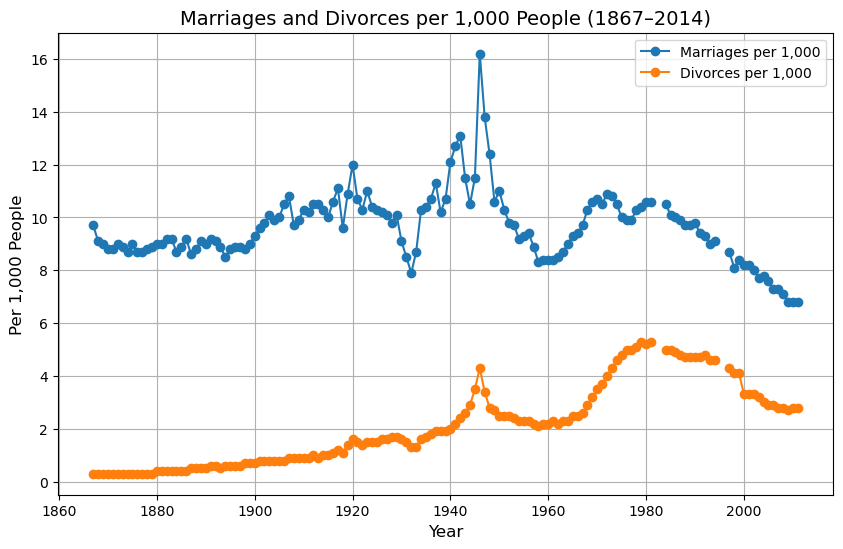

In [77]:
    import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "US-marriages-divorces.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Check the structure of the data
print(data.head())

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot marriages per 1,000
plt.plot(data["Year"], data["Marriages_per_1000"], label="Marriages per 1,000", marker='o')

# Plot divorces per 1,000
plt.plot(data["Year"], data["Divorces_per_1000"], label="Divorces per 1,000", marker='o')

# Add labels, title, and legend
plt.title("Marriages and Divorces per 1,000 People (1867–2014)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Per 1,000 People", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

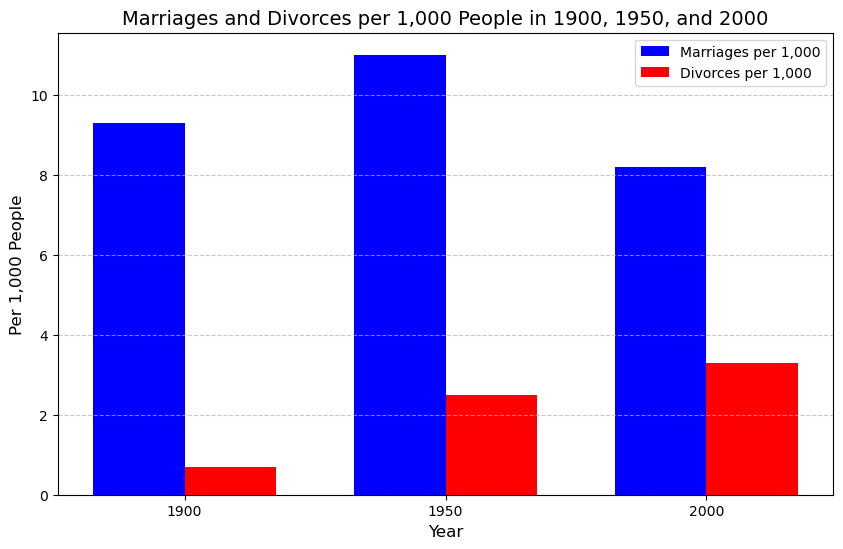

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "US-marriages-divorces.csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Filter the data for the years 1900, 1950, and 2000
filtered_data = data[data["Year"].isin([1900, 1950, 2000])]

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Create bars for marriages and divorces
bar_width = 0.35
x = range(len(filtered_data["Year"]))

plt.bar(x, filtered_data["Marriages_per_1000"], width=bar_width, label="Marriages per 1,000", color='b')
plt.bar([p + bar_width for p in x], filtered_data["Divorces_per_1000"], width=bar_width, label="Divorces per 1,000", color='r')

# Add labels, title, and legend
plt.title("Marriages and Divorces per 1,000 People in 1900, 1950, and 2000", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Per 1,000 People", fontsize=12)
plt.xticks([p + bar_width / 2 for p in x], filtered_data["Year"])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes

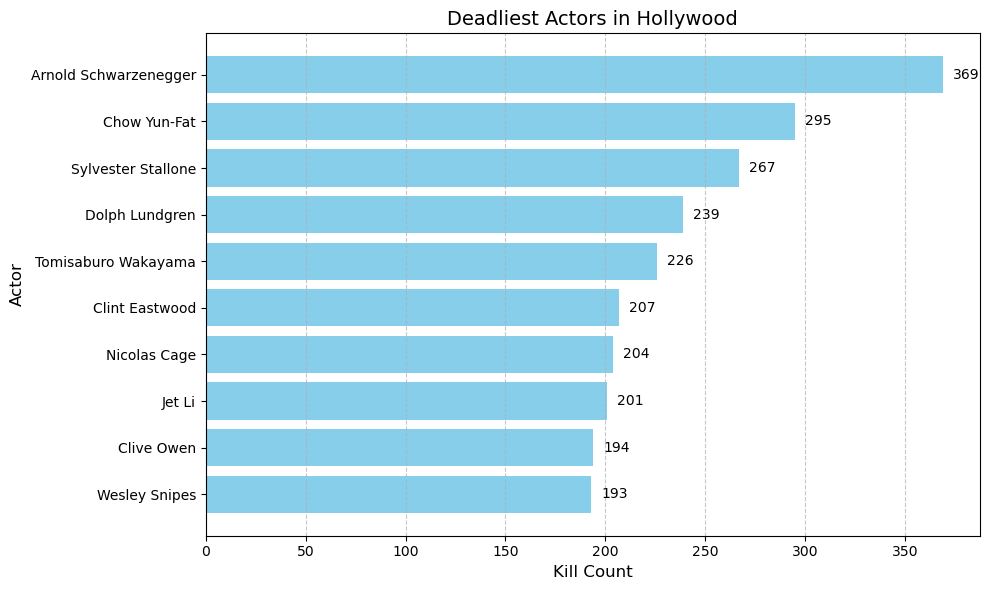

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "actor_kill_counts.csv"  # Replace with your actual file path
actor_data = pd.read_csv(file_path)

# Sort data by Kill Count in descending order for better visualization
actor_data = actor_data.sort_values(by="Count", ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(actor_data["Actor"], actor_data["Count"], color="skyblue")

# Add labels, title, and grid
plt.title("Deadliest Actors in Hollywood", fontsize=14)
plt.xlabel("Kill Count", fontsize=12)
plt.ylabel("Actor", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add kill count as labels on each bar
for index, value in enumerate(actor_data["Count"]):
    plt.text(value + 5, index, str(value), va='center')

# Show the plot
plt.tight_layout()
plt.show()


### Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories

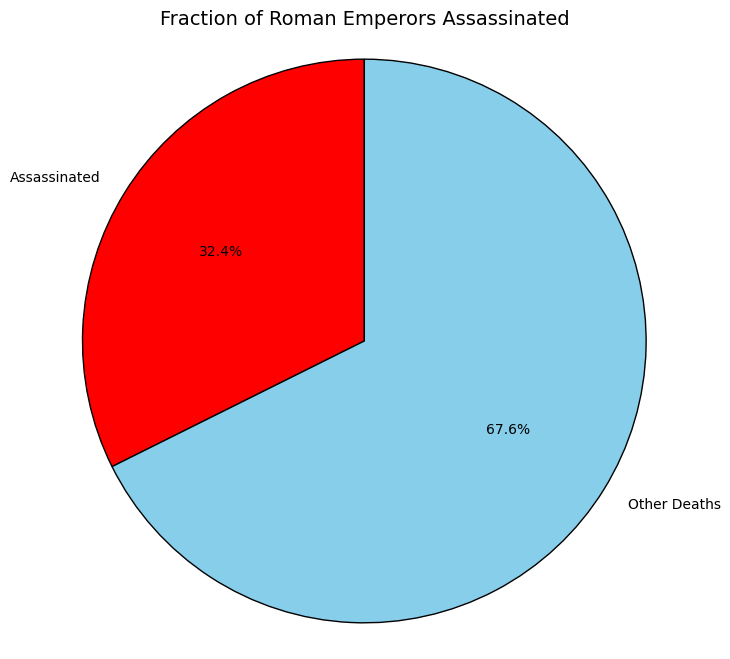

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the uploaded file
file_path = "roman-emperor-reigns.csv"  # Replace with your uploaded file path

# Read the dataset
emperor_data = pd.read_csv(file_path)

# Filter the dataset to count assassinated emperors
assassinated_count = emperor_data[emperor_data["Cause_of_Death"] == "Assassinated"].shape[0]
total_emperors = emperor_data.shape[0]
other_deaths_count = total_emperors - assassinated_count

# Prepare data for the pie chart
data = {
    "Category": ["Assassinated", "Other Deaths"],
    "Count": [assassinated_count, other_deaths_count]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    df["Count"],
    labels=df["Category"],
    autopct="%1.1f%%",  # Show percentages with 1 decimal
    startangle=90,  # Start the pie chart at the top
    colors=["red", "skyblue"],  # Custom colors
    wedgeprops={"edgecolor": "black"}  # Add black borders to wedges
)

# Add a title
plt.title("Fraction of Roman Emperors Assassinated", fontsize=14)

# Ensure the pie chart is a perfect circle
plt.axis("equal")

# Show the plot
plt.show()


### Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

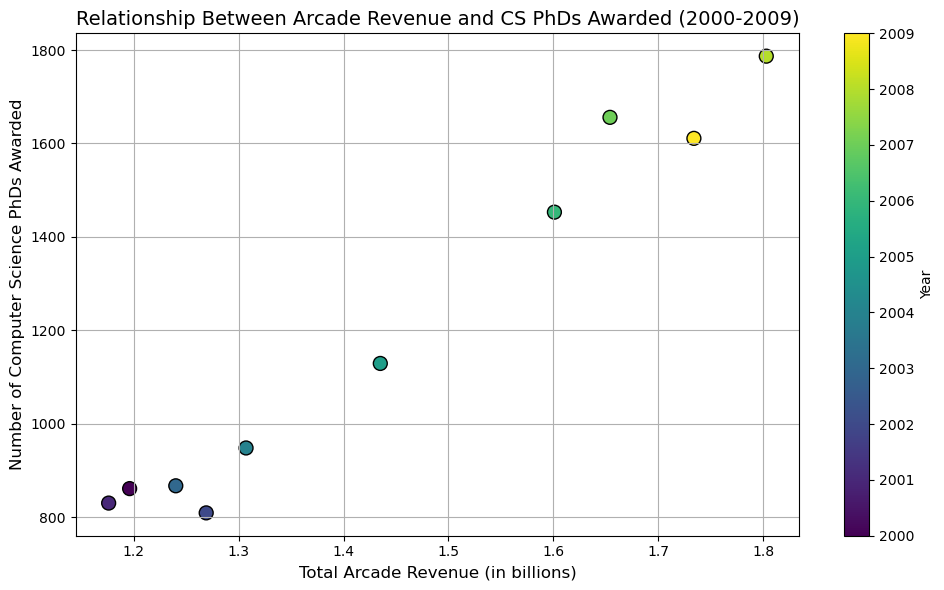

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = "arcade-revenue-vs-cs-doctorates.csv"

try:
    # Load the dataset
    data = pd.read_csv(file_path)

    # Scatter plot
    plt.figure(figsize=(10, 6))

    # Create scatter plot with year as color
    scatter = plt.scatter(
        data["Total Arcade Revenue (billions)"],
        data["Computer Science Doctorates Awarded (US)"],
        c=data["Year"],
        cmap="viridis",
        s=100,  # Marker size
        edgecolor="black"
    )

    # Add color bar
    plt.colorbar(scatter, label="Year")

    # Add labels and title
    plt.title("Relationship Between Arcade Revenue and CS PhDs Awarded (2000-2009)", fontsize=14)
    plt.xlabel("Total Arcade Revenue (in billions)", fontsize=12)
    plt.ylabel("Number of Computer Science PhDs Awarded", fontsize=12)

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("The file was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")
